# Reconocedor de lengua de signos

Vamos a desarrollar una red que reconozca lengua de signos. Para ello, vamos a utilizar un dataset contenido en nuestra cuenta de Google Drive. Antes, debemos montar nuestro sistema de archivos de Google Drive para hacerlo accesible desde este *notebook*. Google nos solicitará permiso, tenemos que copiar y pegar el código que nos suministra.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Ahora ya es accesible

¿Estoy realmente utilizando una GPU? Compruébalo en **Editar / Configuración del cuaderno** o **Entorno de ejecuación / Cambiar tipo de entorno de ejecución**

cats  dogs


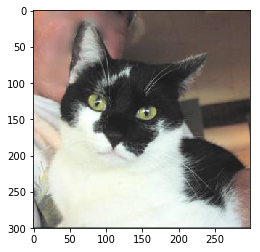

In [2]:
!ls "/content/drive/My Drive/Colab Notebooks/train"

from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image

%matplotlib inline
pil_im = Image.open('/content/drive/My Drive/Colab Notebooks/train/cats/cat.999.jpg', 'r')
imshow(np.asarray(pil_im))



In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## Primer modelo

In [12]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import RMSprop
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import keras
from time import time



# DATA SOURCE --------------------------------------------------

batch_size = 20

train_data_dir = '/content/drive/My Drive/Colab Notebooks/train/'
validation_data_dir = '/content/drive/My Drive/Colab Notebooks/validacion/validation'

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

# MODEL --------------------------------------------------

model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(150, 150, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

# TRAINING --------------------------------------------------

epochs = 10

model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=epochs, 
        validation_data=validation_generator,
        validation_steps=1000,
)

Found 2000 images belonging to 2 classes.
Found 1002 images belonging to 2 classes.
Epoch 1/10
100/100 [==============================] - 138s 1s/step - loss: 1.4864 - acc: 0.5295 - val_loss: 0.6805 - val_acc: 0.5104
Epoch 2/10
100/100 [==============================] - 138s 1s/step - loss: 0.6965 - acc: 0.5890 - val_loss: 0.6773 - val_acc: 0.5144
Epoch 3/10
100/100 [==============================] - 135s 1s/step - loss: 0.6763 - acc: 0.6090 - val_loss: 0.6344 - val_acc: 0.6567
Epoch 4/10
100/100 [==============================] - 135s 1s/step - loss: 0.6482 - acc: 0.6305 - val_loss: 0.6239 - val_acc: 0.6169
Epoch 5/10
100/100 [==============================] - 138s 1s/step - loss: 0.6175 - acc: 0.6725 - val_loss: 0.5934 - val_acc: 0.6784
Epoch 6/10
100/100 [==============================] - 137s 1s/step - loss: 0.5991 - acc: 0.6865 - val_loss: 0.5689 - val_acc: 0.6946
Epoch 7/10
100/100 [==============================] - 136s 1s/step - loss: 0.5929 - acc: 0.6940 - val_loss: 0.5668 - v